### Classification of Skin Lesians
- K Bala Sai Manvitha - CS22B1030
- 21 Feb 2025


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import kagglehub

# Load dataset paths

dataset_path = kagglehub.dataset_download('adityakonduri/dl-lab4-dataset')
dataset_path = os.path.join(dataset_path, 'isic2020')

for d in os.listdir(dataset_path):
    print(d)

train_csv = os.path.join(dataset_path, "train.csv")
test_csv = os.path.join(dataset_path, "test.csv")
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

train
test
.ipynb_checkpoints
train.csv
test.csv


In [4]:
# Load and preprocess data
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

train_df["target"] = train_df["target"].astype(str)
test_df["target"] = test_df["target"].astype(str)

train_df.drop(columns=['patient_id', 'diagnosis', 'benign_malignant'], inplace = True)
test_df.drop(columns=['patient_id', 'diagnosis', 'benign_malignant'], inplace = True)

train_df.head()

train_df.head()

,image_name,sex,age_approx,anatom_site_general_challenge,target
0,ISIC_2637011,male,45.0,head/neck,0
1,ISIC_0015719,female,45.0,upper extremity,0
2,ISIC_0052212,female,50.0,lower extremity,0
3,ISIC_0068279,female,45.0,head/neck,0
4,ISIC_0074268,female,55.0,upper extremity,0


In [5]:
# One-hot encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=['sex', 'anatom_site_general_challenge'], drop_first=True)

test_df = pd.get_dummies(test_df, columns=['sex', 'anatom_site_general_challenge'], drop_first=True)

In [6]:
train_df['image_path'] = train_df['image_name'].apply(lambda x: os.path.join(train_dir, x + ".jpg"))
train_df.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
0,ISIC_2637011,45.0,0,True,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1,ISIC_0015719,45.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...
2,ISIC_0052212,50.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3,ISIC_0068279,45.0,0,False,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
4,ISIC_0074268,55.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...


In [7]:
test_df['image_path'] = test_df['image_name'].apply(lambda x: os.path.join(test_dir, x + ".jpg"))
test_df.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
0,ISIC_0077472,40.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1,ISIC_0080752,50.0,0,True,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
2,ISIC_0084395,45.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3,ISIC_0086709,30.0,0,True,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
4,ISIC_0098784,70.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...


In [8]:
print(train_df['target'].value_counts())

target
0    29436
1      532
Name: count, dtype: int64


In [9]:
# Making a balanced dataframe of both classes

num_benign = train_df[train_df['target'] == '0'].shape[0]
num_malignant = train_df[train_df['target'] == '1'].shape[0]

print(num_benign)
print(num_malignant)

min_count = min(num_benign, num_malignant)

balanced_benign = train_df[train_df['target']=='0'].sample(n = min_count, random_state = 42)

balanced_malignant = train_df[train_df['target']=='1'].sample(n = min_count, random_state = 42)

balanced_df = pd.concat([balanced_benign, balanced_malignant], axis = 0)
balanced_df.head()

29436
532


,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
11783,ISIC_3900049,40.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
25338,ISIC_8304618,55.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
6857,ISIC_2297858,45.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3837,ISIC_1342117,55.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...
3769,ISIC_1322575,55.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...


In [10]:
print(balanced_df['target'].value_counts())

target
0    532
1    532
Name: count, dtype: int64


In [11]:
# Shuffle the dataset
balanced_df = balanced_df.sample(frac = 1, random_state = 42).reset_index(drop=True)

balanced_df.to_csv('balanced_dataset.csv', index = False)

In [12]:
# Convert target column to string
balanced_df['target'] = balanced_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

In [13]:
# Splitting train into train and validation
balanced_df, val_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df["target"], random_state=42)

In [14]:
train_df.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
0,ISIC_2637011,45.0,0,True,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1,ISIC_0015719,45.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...
2,ISIC_0052212,50.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3,ISIC_0068279,45.0,0,False,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
4,ISIC_0074268,55.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...


In [15]:
# print(len(os.listdir(train_dir)))  # Count number of images
# print(os.listdir(train_dir)[:5])   # Show first 5 images

In [16]:
# train_df['image_path'] = train_df['image_name'].apply(lambda x: os.path.join(train_dir, x + ".jpg"))

In [17]:
train_df.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
0,ISIC_2637011,45.0,0,True,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1,ISIC_0015719,45.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...
2,ISIC_0052212,50.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3,ISIC_0068279,45.0,0,False,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
4,ISIC_0074268,55.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...


In [18]:
# Compute class weights for imbalance handling
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_df["target"]), y=train_df["target"])
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [19]:
# Image preprocessing
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size) / 255.0
    return img

In [20]:
# Data Generators
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20)
val_datagen = ImageDataGenerator()


In [21]:
def create_generator(df, directory, datagen, batch_size=32):
    return datagen.flow_from_dataframe(
        df,
        directory=directory,
        x_col="image_path",
        y_col="target",
        target_size=(224, 224),
        class_mode="binary",
        batch_size=batch_size,
        shuffle=True)

train_generator = create_generator(balanced_df, train_dir, train_datagen)
val_generator = create_generator(val_df, train_dir, val_datagen)

Found 851 validated image filenames belonging to 2 classes.
Found 213 validated image filenames belonging to 2 classes.


In [22]:
# # Build ResNet-152 model
# base_model = keras.applications.ResNet152(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# base_model.trainable = False  # Freeze base model

# model = models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(256, activation="relu"),
#     layers.Dropout(0.5),
#     layers.Dense(1, activation="sigmoid")
# ])

In [23]:
# Identity Block
def identity_block(x, filters):
    f1, f2, f3 = filters
    x_skip = x

    x = layers.Conv2D(f1, (1,1), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f2, (3,3), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f3, (1,1), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, x_skip])
    x = layers.ReLU()(x)

    return x

In [24]:
# Convolutional Block
def conv_block(x, filters, strides=(2,2)):
    f1, f2, f3 = filters
    x_skip = x

    x = layers.Conv2D(f1, (1,1), strides=strides, padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f2, (3,3), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f3, (1,1), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    x_skip = layers.Conv2D(f3, (1,1), strides=strides, padding='same', kernel_initializer='he_normal')(x_skip)
    x_skip = layers.BatchNormalization()(x_skip)

    x = layers.Add()([x, x_skip])
    x = layers.ReLU()(x)

    return x

In [25]:
# ResNet-152 Model
def ResNet152(input_shape=(224, 224, 3), classes=1):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7,7), strides=(2,2), padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

    # Conv2_x
    x = conv_block(x, [64, 64, 256], strides=(1,1))
    for _ in range(2):
        x = identity_block(x, [64, 64, 256])

    # Conv3_x
    x = conv_block(x, [128, 128, 512])
    for _ in range(7):
        x = identity_block(x, [128, 128, 512])

    # Conv4_x
    x = conv_block(x, [256, 256, 1024])
    for _ in range(35):
        x = identity_block(x, [256, 256, 1024])

    # Conv5_x
    x = conv_block(x, [512, 512, 2048])
    for _ in range(2):
        x = identity_block(x, [512, 512, 2048])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(classes, activation='sigmoid')(x)

    model = models.Model(inputs, x)
    return model

In [26]:
# Instantiate the model
model = ResNet152(input_shape=(224, 224, 3), classes=1)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 112, 112, 64)   │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 112, 112, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 112, 112, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 56, 56, 64)     │              0 │ re_lu[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 56, 56, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 56, 56, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 256)    │         16,640 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 56, 56, 256)    │         16,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 56, 56, 256)    │          1,024 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 56, 56, 256)    │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 256)    │              0 │ batch_normalization_3… │
│                           │                        │                │ batch_normalization_4… │
├──────────────────────

 Total params: 58,372,993 (222.68 MB)

 Trainable params: 58,221,569 (222.10 MB)

 Non-trainable params: 151,424 (591.50 KB)

In [27]:
# For in-built model

 # Compile model
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
#               loss="binary_crossentropy",
#               metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [28]:
# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight_dict)

# model.fit(train_generator, epochs=10, validation_data=val_generator, class_weight=class_weights)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2039s 70s/step - accuracy: 0.5457 - loss: 8.2375 - precision: 0.5190 - recall: 0.6614 - val_accuracy: 0.5023 - val_loss: 421131.2188 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1902s 68s/step - accuracy: 0.5045 - loss: 1.2707 - precision: 0.5045 - recall: 1.0000 - val_accuracy: 0.5023 - val_loss: 2729.3003 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1856s 69s/step - accuracy: 0.4906 - loss: 1.1853 - precision: 0.4906 - recall: 1.0000 - val_accuracy: 0.5023 - val_loss: 649.4462 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1802s 67s/step - accuracy: 0.5149 - loss: 1.1051 - precision: 0.5149 - recall: 1.0000 - val_accuracy: 0.5164 - val_loss: 72.6864 - val_precision: 0.6364 - val_recall: 0.0660
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1819s 67s/step - accuracy: 0.4849 - loss: 1.1914 - precision: 0.4849 - recall: 1.00

In [29]:
# Separate benign and malignant samples
benign_samples = test_df[test_df['target'] == '0']
malignant_samples = test_df[test_df['target'] == '1']

# Reduce benign samples to match malignant samples (or a reasonable ratio)
benign_samples = benign_samples.sample(n=40, random_state=42)  # Adjust `n` as needed

# Merge back into a new test dataframe
balanced_test_df = pd.concat([benign_samples, malignant_samples]).sample(frac=1, random_state=42)  # Shuffle

In [30]:
# Use balanced_test_df to create test generator
test_generator = create_generator(balanced_test_df, test_dir, val_datagen, batch_size=8)

# Evaluate model
# test_generator = create_generator(test_df, test_dir, val_datagen, batch_size=8)

results = model.evaluate(test_generator)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")

Found 80 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5524 - loss: 1.2386 - precision: 0.5524 - recall: 1.0000
Test Loss: 1.6252
Test Accuracy: 0.5000
Test Precision: 0.5000
Test Recall: 1.0000


In [40]:
from sklearn.metrics import classification_report

# Get true labels
true_labels = test_generator.classes  # Only works with flow_from_dataframe or flow_from_directory

# Get predicted labels
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)  # Convert softmax probabilities to class index

pred_labels = (pred_probs > 0.97).astype(int)

# Print classification report (includes precision, recall, F1-score)
report = classification_report(true_labels, pred_labels, target_names=test_generator.class_indices.keys())
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step
              precision    recall  f1-score   support

           0       0.54      0.55      0.54        40
           1       0.54      0.53      0.53        40

    accuracy                           0.54        80
   macro avg       0.54      0.54      0.54        80
weighted avg       0.54      0.54      0.54        80



10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step


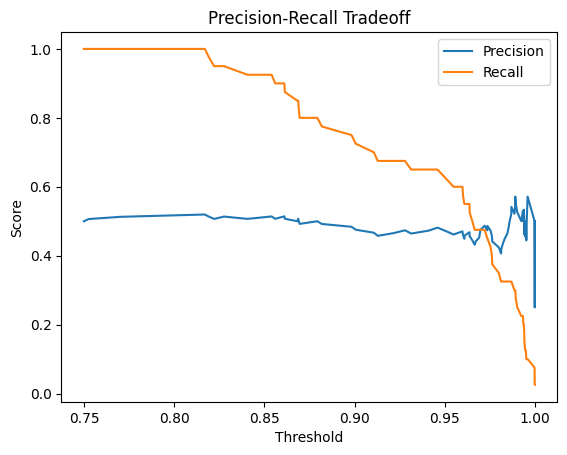

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

pred_probs = model.predict(test_generator)[:, 0]  # Get probability of class 1
precision, recall, thresholds = precision_recall_curve(test_generator.classes, pred_probs)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall Tradeoff")
plt.show()

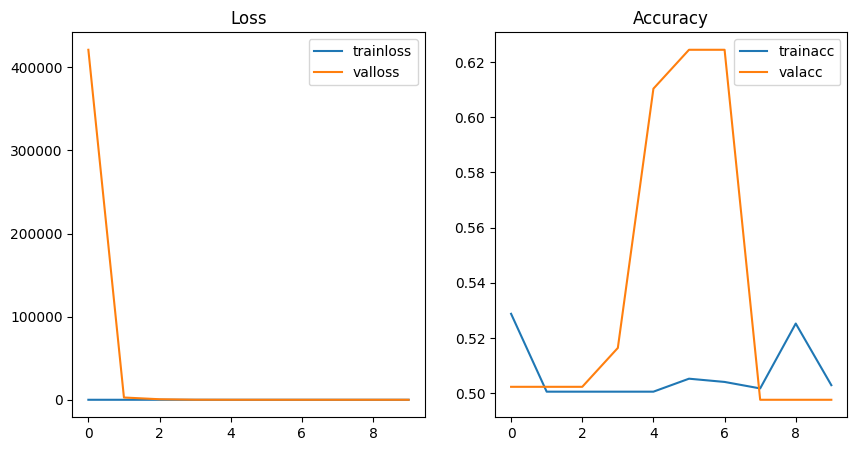

In [44]:
trainloss = history.history["loss"]
valloss = history.history["val_loss"]
# testloss = history.history["test_loss"]

trainacc = history.history['accuracy']
valacc = history.history['val_accuracy']
# testacc = history.history['test_accuracy']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(trainloss, label = 'trainloss')
axes[0].plot(valloss, label = 'valloss')
# axes[0].plot(testloss, label = 'testloss')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(trainacc, label = 'trainacc')
axes[1].plot(valacc, label = 'valacc')
# axes[1].plot(testacc, label = 'testacc')
axes[1].set_title('Accuracy')
axes[1].legend()

plt.show()

I achieved 58% accuracy when training and testing the model on a balanced dataset with an equal number of Benign and Malignant cases. However, when using the original imbalanced dataset, the model reached 98% accuracy, but with a precision and recall of 0. This suggests that the model is biased towards predicting Benign for all data points.